In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.constants import g

In [28]:
df = pd.read_excel("data/gunn-kinzer-raindrop-velocity-small.xlsx")
df.head()

,diameter [cm],velocity [cm/sec],Mass [micrograms]
0,0.002,1.197,0.00418
1,0.004,4.730,0.03340
2,0.006,10.300,0.11300
3,0.008,17.400,0.26700
4,0.010,25.400,0.52400


The density of air is $\rho = 1.2041 kg/m^3$ at a standard atmospheric pressure of $101.325$ $kPa$ and at 20°C. This value can vary based on temperature, pressure, and humidity levels. 

At 20°C with the same atmospheric pressure of 101.325 kPa, the viscosity of air is about $1.81 \times 10^{-5} Pa \cdot s$. This value also changes based on the temperature and pressure. 

The equation for the Reynolds number is as follows:
$$
Re = \frac{\rho_{air} v l}{\mu_{air}}
$$

Diameter here will be used as the characteristic length.

In [29]:
# Constants
RHO_AIR = 1.2041  # density of air in kg/m³
MU_AIR = 1.81e-5  # dynamic viscosity of air in Pa·s (or kg/(m·s))

# Convert diameter and velocity from cm and cm/s to m and m/s
df['diameter [m]'] = df['diameter [cm]'] / 100
df['velocity [m/sec]'] = df['velocity [cm/sec]'] / 100

# Calculate Reynolds number for each raindrop
df['Reynolds'] = (RHO_AIR * df['velocity [m/sec]'] * df['diameter [m]']) / MU_AIR

# Find the Reynolds number for the smallest and largest raindrops
velocity_smallest = df["velocity [cm/sec]"].min()
velocity_largest = df["velocity [cm/sec]"].max()
diameter_smallest = df["diameter [cm]"].min()
diameter_largest = df["diameter [cm]"].max()
reynolds_smallest = df['Reynolds'].min()
reynolds_largest = df['Reynolds'].max()

print(f"Smallest velocity: {velocity_smallest} cm/sec")
print(f"Smallest length: {diameter_smallest} cm")
print(f"Smallest Reynolds Number : {reynolds_smallest}")
print(f"Largest velocity: {velocity_largest} cm/sec")
print(f"Largest length: {diameter_largest} cm")
print(f"Largest Reynolds Number: {reynolds_largest}")

Smallest velocity: 1.197 cm/sec
Smallest length: 0.002 cm
Smallest Reynolds Number : 0.01592605193370166
Largest velocity: 806.0 cm/sec
Largest length: 0.3 cm
Largest Reynolds Number: 1608.5711602209944


![Real Raindrops](images/real_raindrops.png)

Source: https://sciencenotes.org/the-real-raindrop-shape-is-not-a-teardrop/

$$
F_g = \frac{4}{3} \pi r^3 \rho_{water} g \\
F_D = k_1 \mu v d
$$


Given the following quantities above, because raindrops reached terminal velocity, acceleration equals zero due to the equillibrium state of the droplets, so $F_g = F_D$.

$$
F_g = F_d \\
\implies v = \frac{\pi \rho g}{6 k_1 \mu} \cdot d^2
$$

In [34]:
from sklearn.linear_model import LinearRegression

# Constants
RHO_WATER = 1000  # density of water in kg/m³ (assuming raindrops are water)

# Select the first three data points for small Reynolds numbers
small_Re_data = df.head(3)

# Prepare the data for linear regression (X: D^2, y: v)
X = (small_Re_data['diameter [m]']) ** 2
y = small_Re_data['velocity [m/sec]']

# Reshape X for sklearn
X_reshaped = X.values.reshape(-1, 1)

# Perform linear regression
model = LinearRegression()
model.fit(X_reshaped, y)

# Extract the coefficient (slope)
slope = model.coef_[0]

# Calculate k1 from the slope
k1 = (np.pi * RHO_WATER * g) / (6 * slope * MU_AIR)

print(f"k1: {k1}")

k1: 9.993945872046686


In [32]:
print(g)

9.80665


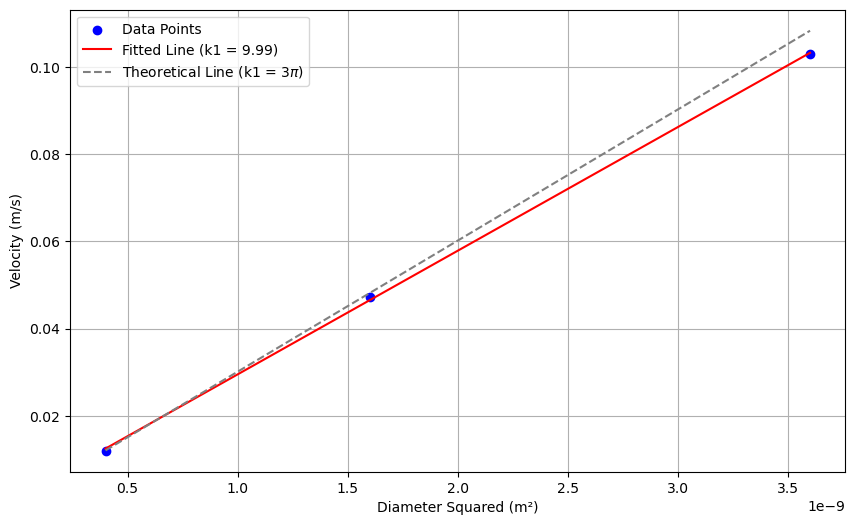

In [45]:
# Generate a range of D^2 values for plotting the fitted line
D_squared_range = np.linspace(X.min(), X.max(), 100)
v_predicted = model.predict(D_squared_range.reshape(-1, 1))

theory_slope = (RHO_WATER * g) / (6 * 3 * MU_AIR)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(D_squared_range, v_predicted, color='red', label=f'Fitted Line (k1 = {k1:.2f})')
plt.plot(D_squared_range, theory_slope * D_squared_range, color='gray', linestyle="--", label=r'Theoretical Line (k1 = 3$\pi$)')
plt.xlabel('Diameter Squared (m²)')
plt.ylabel('Velocity (m/s)')
plt.legend()
plt.grid(True)
plt.savefig("plots/terminal_velocity_diameter_squared_small_droplets.png")
plt.show()

https://galileo.phys.virginia.edu/classes/152.mf1i.spring02/Stokes_Law.htm

$$
F_D = F_D \\
\implies 6 \pi \mu_{air} r v = k_1 \mu_{air} d v \\
\implies 6 \pi \mu_{air} (\frac{d}{2}) v = k_1 \mu_{air} d v \\
\implies 3 \pi \mu d v = k_1 \mu d v \\
k_1 = 3 \pi \approx 9.425
$$

This approax through Stokes Law yields a similar $k_1$. 

In [42]:
error_small_reynolds = (3 * np.pi - k1) * 100 / (3 * np.pi)
print(f"Small Reynolds Number relative error: {error_small_reynolds}%")

Small Reynolds Number relative error: -6.039059101938174%


In [36]:
df.head()

,diameter [cm],velocity [cm/sec],Mass [micrograms],diameter [m],velocity [m/sec],Reynolds
0,0.002,1.197,0.00418,0.00002,0.01197,0.015926
1,0.004,4.730,0.03340,0.00004,0.04730,0.125865
2,0.006,10.300,0.11300,0.00006,0.10300,0.411124
3,0.008,17.400,0.26700,0.00008,0.17400,0.926026
4,0.010,25.400,0.52400,0.00010,0.25400,1.689731
